In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys, os, time, math
sys.path.append('/home/groups/ZuckermanLab/jalim/instalLocal/celltraj/celltraj')
import jcTrajectory_CP as cellTraj
import h5py, umap, scipy, json
import string, ast
from datetime import date
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
trajl = 17 # Trajectory Length for morphodynamical trajectory analysis
wellsInfo = 'Awells'
conditions = ['A2'] # LIGANDS or CONDITIONS
tmSet = ['EGF1']
n_conditions = len(tmSet) # Total number of Ligand Conditions
today = date.today()
date2day = today.strftime("%b%d-%Y")
sysName = 'LI204601_P'
figid = f"{sysName}_tlen{trajl-1}_{date2day}"

In [4]:
# Get Cross correlations & respective frame numbers along all single-cell trajectories
def get_cross_corr_all_single_cell_trajs(filename):
      cross_corr_sctraj = []
      frame_num_sctraj = []
      with open(filename, 'r') as file_in:
          # Create an iterator over the file lines 
          file_iter = iter(file_in)
          try:
              while True:
                  # Read two lines at a time: Cross correlations & the corresponding frame numbers
                  line1 = next(file_iter).strip()
                  if line1:
                          data = ast.literal_eval(line1)
                          cross_corr_sctraj.append(data)
                          line2 = next(file_iter).strip()
                          # Parse line2 as a list of integers
                          frame_numbers = ast.literal_eval(line2)   
                          frame_num_sctraj.append(frame_numbers)
          except StopIteration:
              # End of file reached
              pass
      cross_corr_all_sctraj_file = cross_corr_sctraj
      frame_num_all_sctraj_file = frame_num_sctraj
      
      return cross_corr_all_sctraj_file, frame_num_all_sctraj_file

In [5]:
# Get cross-correlation values along all single-cell trajectories (sorted as per trajectory length) 
cc_path = '/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/dcompCCtraj_states/'
cc_filename = f"{cc_path}{sysName}_{conditions[0]}_1.dat"
cross_correlations, frame_numbers = get_cross_corr_all_single_cell_trajs(cc_filename)

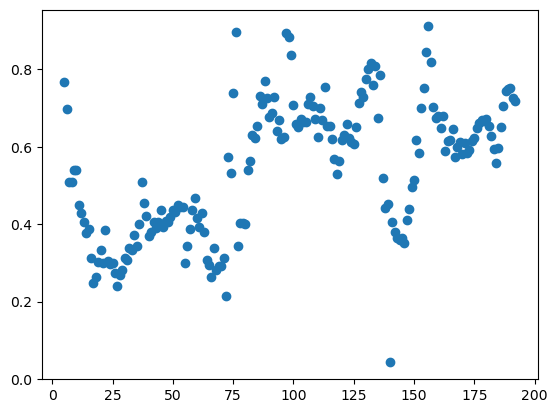

In [23]:
test_index = 274
plt.scatter(frame_numbers[test_index], cross_correlations[test_index])

In [6]:
cc_micro_path = "/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/micStatesContourCCvals/"
cc_micro_fn = "cc_vals_by_microstates_LI204601_P_tl16AllWells_Apr29-2024_10.json"
cc_micro_info = cc_micro_path + cc_micro_fn

In [7]:
with open(cc_micro_info, 'r') as fp:
    cc_values_all_conditions = json.load(fp)

In [14]:
for condition, cc_values_per_condition in cc_values_all_conditions.items():
    for microstate, cc_values_per_microstate in enumerate(cc_values_per_condition):
        print(len(cc_values_per_microstate))

5942
409
1398
358
1012
889
256
2185
1631
4021
3250
1992
7092
3022
3682
5116
1889
340
1595
2607
136
7257
1856
7220
3107
4618
709
85
309
298
2479
1144
5240
2469
3086
6196
182
159
3086
653
10439
227
2642
495
922
4815
101
1568
11191
562
6989
277
1425
472
877
950
239
2081
1726
4095
781
1748
2459
1483
3140
1976
2860
201
1591
2409
148
7311
1545
6593
3510
4363
663
91
149
507
2283
1929
4481
2841
3901
6749
364
323
3954
874
10074
279
2301
419
966
3357
66
1499
9825
439
492
4021
4409
5732
3331
4473
204
43
396
1380
751
1109
770
278
1837
352
1864
265
510
6314
2791
1571
4770
2876
3066
5385
168
132
1464
1755
